In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [14]:
df = pd.read_csv('./csv/spotify_songs.csv')
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [15]:
df = df.drop_duplicates(subset=['track_id'], keep='first')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28356 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  28356 non-null  object 
 1   track_name                28352 non-null  object 
 2   track_artist              28352 non-null  object 
 3   track_popularity          28356 non-null  int64  
 4   track_album_id            28356 non-null  object 
 5   track_album_name          28352 non-null  object 
 6   track_album_release_date  28356 non-null  object 
 7   playlist_name             28356 non-null  object 
 8   playlist_id               28356 non-null  object 
 9   playlist_genre            28356 non-null  object 
 10  playlist_subgenre         28356 non-null  object 
 11  danceability              28356 non-null  float64
 12  energy                    28356 non-null  float64
 13  key                       28356 non-null  int64  
 14  loudness   

In [6]:
df['playlist_name'].value_counts()

playlist_name
Indie Poptimism                                   294
Permanent Wave                                    223
Hard Rock Workout                                 211
Southern Hip Hop                                  174
post teen pop                                     159
                                                 ... 
Verano Forever                                      5
URBAN NATION                                        4
ALPAS Music Festival                                2
TOP 50 GLOBAL 2020 UPDATED WEEKLY 🌍🎶 WORLDWIDE      2
Post-Teen Pop                                       1
Name: count, Length: 448, dtype: int64

In [17]:
df[df['track_artist'] == 'Taylor Swift']

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
735,3i9UVldZOE0aD0JnyfAZZ0,Lover (Remix) [feat. Shawn Mendes],Taylor Swift,85,2UfvnX1YYeC2cExMQTMbXC,Lover (Remix) [feat. Shawn Mendes],2019-11-13,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,7,-7.176,1,0.0640,0.43300,0.000000,0.0862,0.4220,205.272,221307
1720,1u8c2t2Cy7UBoG4ArRcF5g,Blank Space,Taylor Swift,78,1yGbNOtRIgdIiGHOEBaZWf,1989 (Deluxe),2014-01-01,Post pop teen,222nc9tKxKhfZ2GBrOpwH3,pop,...,5,-5.412,1,0.0540,0.10300,0.000000,0.0913,0.5700,95.997,231827
1787,6RRNNciQGZEXnqk8SQ9yv5,You Need To Calm Down,Taylor Swift,86,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,Intro to Post-Teen Pop,6o6MNYZqHSkMAKcCHPNu7K,pop,...,2,-5.617,1,0.0553,0.00929,0.000000,0.0637,0.7140,85.026,171360
1811,1mQRQlbf1nXbazPEuSyij8,22,Taylor Swift,0,092fm0yKd9V4VGi6G3u51Y,22,2012-01-01,🤩🤪Post Teen Pop🤪🤩,6IT8LGpwLw3Pt2XnVUBN7j,pop,...,7,-6.548,1,0.0373,0.00288,0.001330,0.0631,0.6760,104.011,231867
2066,6FB3v4YcR57y4tXFcdxI1E,I Knew You Were Trouble.,Taylor Swift,76,4jTYApZPMapg56gRycOn0D,Red (Big Machine Radio Release Special),2012-10-21,post teen pop,2ltt5ouiEO301o2jbxn30d,pop,...,3,-6.798,0,0.0363,0.00454,0.000002,0.0335,0.6790,77.019,219720
2088,43H3q2NWT9LCuYS1B5IUvV,Our Song,Taylor Swift,61,2rU7u7C2v5i45MFVxx7xG1,Taylor Swift (Big Machine Radio Release Special),2006-10-23,post teen pop,2ltt5ouiEO301o2jbxn30d,pop,...,2,-4.932,1,0.0298,0.11300,0.000000,0.3250,0.5750,89.128,203440
2089,0KztjtD3ytzgYjUKIVfBnW,Mean,Taylor Swift,62,6Ar2o9KCqcyYF9J0aQP3au,Speak Now,2010-01-01,post teen pop,2ltt5ouiEO301o2jbxn30d,pop,...,4,-3.978,1,0.0426,0.44500,0.000000,0.2190,0.8080,164.004,237747
2209,1JbR9RDP3ogVNEWFgNXAjh,Look What You Made Me Do,Taylor Swift,74,1Hrs3jLGexOvBoaPMoOQYJ,reputation (Big Machine Radio Release Special),2017-11-08,Post Teen Pop,2Aud8PXoTGcyY5esHu4Aaz,pop,...,9,-6.471,0,0.1230,0.20400,0.000014,0.1260,0.5060,128.070,211853
2250,12WvaS3V4dPRBU2o37vX69,Gorgeous,Taylor Swift,67,1Hrs3jLGexOvBoaPMoOQYJ,reputation (Big Machine Radio Release Special),2017-11-08,Post Teen Pop,2Aud8PXoTGcyY5esHu4Aaz,pop,...,7,-6.684,1,0.1350,0.07130,0.000009,0.2130,0.4510,92.027,209680
2332,0VwNdo84DaVYLIkbVO86ND,We Are Never Ever Getting Back Together,Taylor Swift,74,4jTYApZPMapg56gRycOn0D,Red (Big Machine Radio Release Special),2012-10-21,post teen pop,6rjxP7GQKoqqgoakzxl3PY,pop,...,7,-5.911,1,0.0916,0.00957,0.000027,0.1210,0.7500,85.984,193147


In [18]:
df[df['track_artist'] == 'Ed Sheeran']

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.10200,0.000000,0.0653,0.518,122.036,194754
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-5.385,1,0.1270,0.07990,0.000000,0.1430,0.585,124.982,163049
10,3eFJI470ALf1EYjywPRsJy,Cross Me (feat. Chance the Rapper & PnB Rock) ...,Ed Sheeran,58,49bXZtlI5kQSqQMSCnSaWO,Cross Me (feat. Chance the Rapper & PnB Rock) ...,2019-06-21,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-6.500,1,0.1810,0.14600,0.000005,0.1240,0.752,121.984,207894
15,1EJgymgJHcjSOGSHcYaxvW,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,66,1imXAvLuowvPYIsFMYUPY0,South of the Border (feat. Camila Cabello & Ca...,2019-12-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,-4.603,1,0.0896,0.13000,0.000005,0.3650,0.722,125.028,188230
78,3vQhEd4lOg4mAV6CHCgoHW,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,65,05Bru0ZVTxp4orAyrZIA77,South of the Border (feat. Camila Cabello & Ca...,2019-10-04,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,5,-4.388,1,0.0404,0.22000,0.000046,0.3350,0.491,110.012,173455
226,19TOAlTFq0NDHvUPQR0tkr,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,69,3BjxjIkTZKUpeZ6n5MYMNx,South of the Border (feat. Camila Cabello & Ca...,2019-09-27,Cardio,37i9dQZF1DWSJHnPb1f0X3,pop,...,2,-5.727,0,0.0658,0.21200,0.000000,0.1110,0.782,114.054,195924
315,1uuUnsWpJwqBh5GRQ8uxla,Happier - Tiësto’s AFTR:HRS Remix,Ed Sheeran,53,5GpwroXObdnETiIpVb1l23,Happier (Tiësto’s AFTR:HRS Remix),2018-06-01,Dance Pop Hits,37i9dQZF1DX6pH08wMhkaI,pop,...,0,-4.881,1,0.0296,0.00576,0.000007,0.2010,0.384,117.993,216000
1218,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,86,3T4tUhGYeRNVUGevb0wThu,÷ (Deluxe),2017-03-03,Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s,4QAzO1Z92yqqD6Mf3mOANu,pop,...,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,233713
1311,70eFcWOvlMObDhURTqT4Fv,Beautiful People (feat. Khalid),Ed Sheeran,85,3oIFxDIo2fwuk4lwCmFZCx,No.6 Collaborations Project,2019-07-12,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,5,-8.113,0,0.1870,0.12400,0.000000,0.0802,0.548,92.977,197867
1320,4vUmTMuQqjdnvlZmAH61Qk,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,91,3oIFxDIo2fwuk4lwCmFZCx,No.6 Collaborations Project,2019-07-12,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,9,-6.376,0,0.0824,0.14800,0.000000,0.0865,0.668,97.986,204467


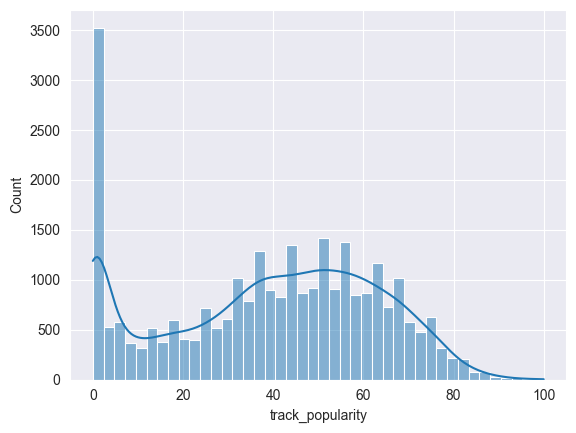

In [9]:
sns.histplot(df['track_popularity'], bins='auto', kde=True)
plt.show()

In [19]:
df = df[df['track_popularity']>=30]
# 출처 : https://lodgecove.com/what-is-the-spotify-popularity-index/
# 유명도가 낮은 노래 제거

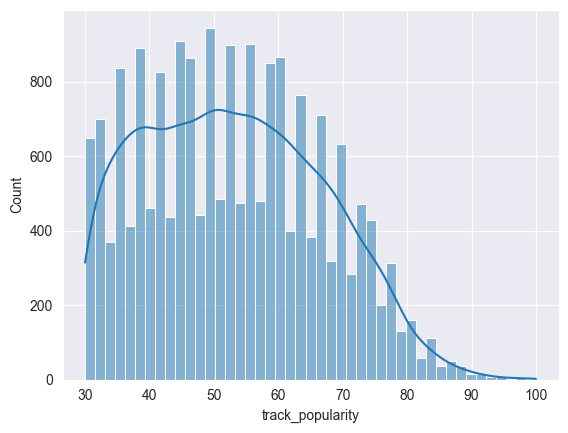

In [20]:
sns.histplot(df['track_popularity'], bins='auto', kde=True)
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19253 entries, 0 to 32828
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  19253 non-null  object 
 1   track_name                19253 non-null  object 
 2   track_artist              19253 non-null  object 
 3   track_popularity          19253 non-null  int64  
 4   track_album_id            19253 non-null  object 
 5   track_album_name          19253 non-null  object 
 6   track_album_release_date  19253 non-null  object 
 7   playlist_name             19253 non-null  object 
 8   playlist_id               19253 non-null  object 
 9   playlist_genre            19253 non-null  object 
 10  playlist_subgenre         19253 non-null  object 
 11  danceability              19253 non-null  float64
 12  energy                    19253 non-null  float64
 13  key                       19253 non-null  int64  
 14  loudness   

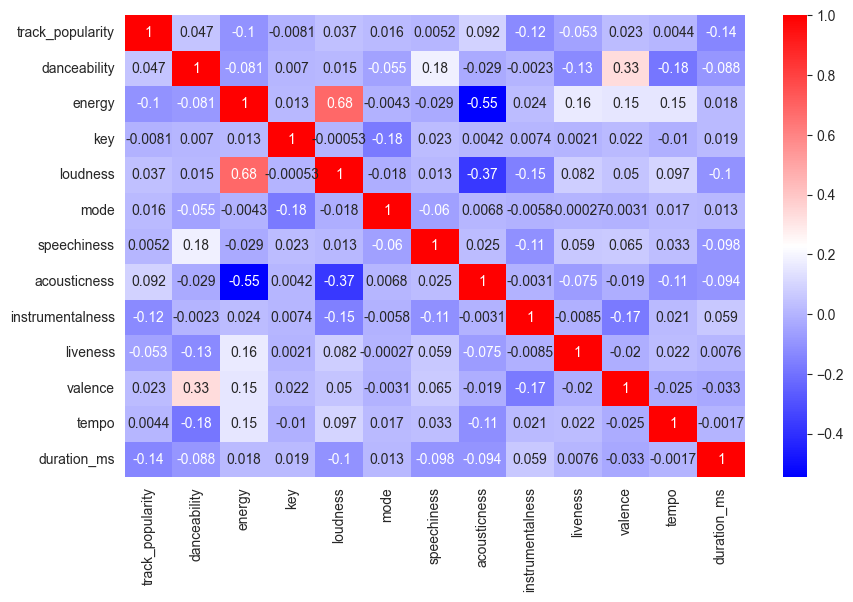

In [10]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='bwr')
plt.show()

0.1 ~ 0.3 또는 -0.1 ~ -0.3: 약한 상관관계 (Weak correlation)
0.3 ~ 0.5 또는 -0.3 ~ -0.5: 중간 정도의 상관관계 (Moderate correlation)
0.5 ~ 1 또는 -0.5 ~ -1: 강한 상관관계 (Strong correlation)

popularity와 instrumentalness는 약한 음의 상관관계를 가진다 (-0.17)

energy와 loudness는 강한 양의 상관관계를 가진다. (0.68)
energy와 acousticness는 강한 음의 상관관계 (-0.54)
energy와 liveness, valence, tempo는 약한 양의 상관관계 (0.16, 0.19, 0.15)

dancability와 valence는 중간 정도의 양의 상관관계를 가진다. (0.33)
dancability와 speechiness는 약한 양의 상관관계를 가진다. (0.18)
dancability와 liveness, tempo는 약한 음의 상관관계를 가진다 (-0.11, -0.18)

key는 mode와 약한 음의 상관관계 (-0.17)

loudness와 acousticness는 중간 정도의 음의 상관관계 (-0.38)
loudness와 instrumentalness는 약한 음의 상관관계(-0.19)

acousticness와 tempo는 약한 음의 상관관계(-0.12)

instrumentalness와 valence는 약한 음의 상관관계(-0.15)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19253 entries, 0 to 32828
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  19253 non-null  object 
 1   track_name                19253 non-null  object 
 2   track_artist              19253 non-null  object 
 3   track_popularity          19253 non-null  int64  
 4   track_album_id            19253 non-null  object 
 5   track_album_name          19253 non-null  object 
 6   track_album_release_date  19253 non-null  object 
 7   playlist_name             19253 non-null  object 
 8   playlist_id               19253 non-null  object 
 9   playlist_genre            19253 non-null  object 
 10  playlist_subgenre         19253 non-null  object 
 11  danceability              19253 non-null  float64
 12  energy                    19253 non-null  float64
 13  key                       19253 non-null  int64  
 14  loudness   

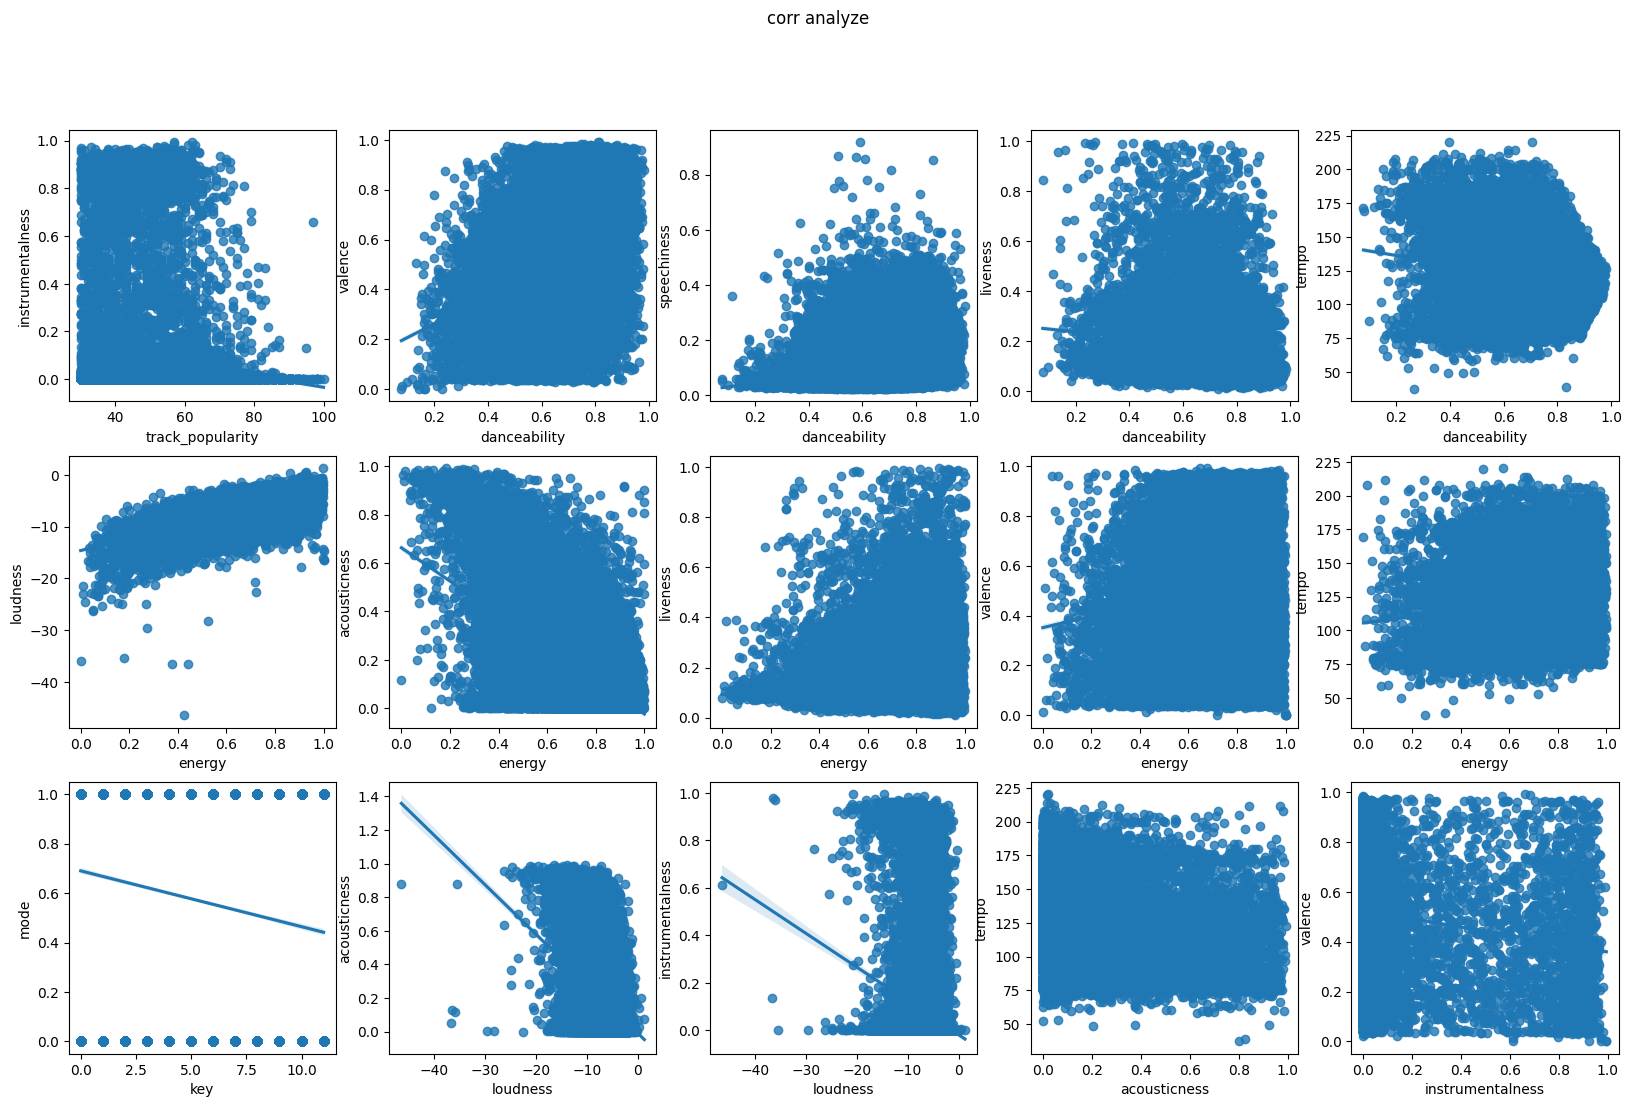

In [136]:
fig, axs = plt.subplots(3, 5, figsize=(20,12))
fig.suptitle('corr analyze')

sns.regplot(data = df, x='track_popularity', y='instrumentalness', ax=axs[0, 0])
sns.regplot(data = df, x='danceability', y='valence', ax=axs[0, 1])
sns.regplot(data = df, x='danceability', y='speechiness', ax=axs[0, 2])
sns.regplot(data = df, x='danceability', y='liveness', ax=axs[0, 3])
sns.regplot(data = df, x='danceability', y='tempo', ax=axs[0, 4])
sns.regplot(data = df, x='energy', y='loudness', ax=axs[1, 0])
sns.regplot(data = df, x='energy', y='acousticness', ax=axs[1, 1])
sns.regplot(data = df, x='energy', y='liveness', ax=axs[1, 2])
sns.regplot(data = df, x='energy', y='valence', ax=axs[1, 3])
sns.regplot(data = df, x='energy', y='tempo', ax=axs[1, 4])
sns.regplot(data = df, x='key', y='mode', ax=axs[2, 0])
sns.regplot(data = df, x='loudness', y='acousticness', ax=axs[2, 1])
sns.regplot(data = df, x='loudness', y='instrumentalness', ax=axs[2, 2])
sns.regplot(data = df, x='acousticness', y='tempo', ax=axs[2, 3])
sns.regplot(data = df, x='instrumentalness', y='valence', ax=axs[2, 4])

plt.show()

In [22]:
df_taylor = pd.read_csv('./csv/taylor_swift_spotify.csv')
df_taylor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        566 non-null    int64  
 1   name              566 non-null    object 
 2   album             566 non-null    object 
 3   release_date      566 non-null    object 
 4   track_number      566 non-null    int64  
 5   id                566 non-null    object 
 6   uri               566 non-null    object 
 7   acousticness      566 non-null    float64
 8   danceability      566 non-null    float64
 9   energy            566 non-null    float64
 10  instrumentalness  566 non-null    float64
 11  liveness          566 non-null    float64
 12  loudness          566 non-null    float64
 13  speechiness       566 non-null    float64
 14  tempo             566 non-null    float64
 15  valence           566 non-null    float64
 16  popularity        566 non-null    int64  
 1

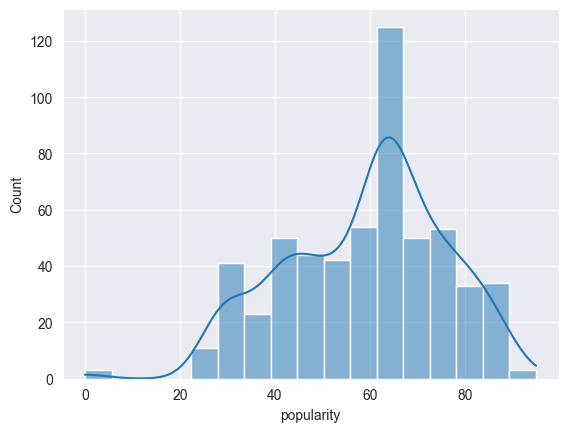

In [23]:
sns.histplot(df_taylor['popularity'], bins='auto', kde=True)
plt.show()

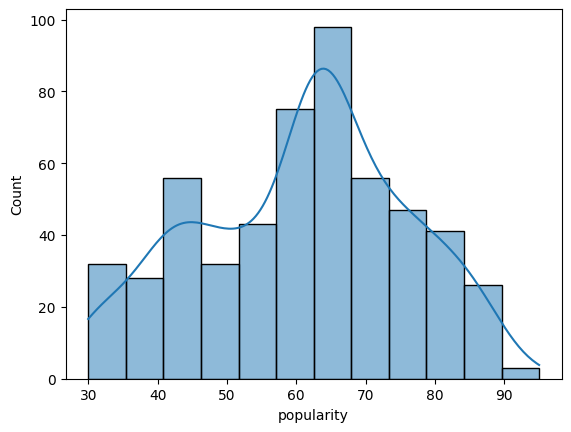

In [139]:
df_taylor = df_taylor[df_taylor['popularity']>=30]
sns.histplot(df_taylor['popularity'], bins='auto', kde=True)
plt.show()

In [140]:
df_taylor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 0 to 565
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        537 non-null    int64  
 1   name              537 non-null    object 
 2   album             537 non-null    object 
 3   release_date      537 non-null    object 
 4   track_number      537 non-null    int64  
 5   id                537 non-null    object 
 6   uri               537 non-null    object 
 7   acousticness      537 non-null    float64
 8   danceability      537 non-null    float64
 9   energy            537 non-null    float64
 10  instrumentalness  537 non-null    float64
 11  liveness          537 non-null    float64
 12  loudness          537 non-null    float64
 13  speechiness       537 non-null    float64
 14  tempo             537 non-null    float64
 15  valence           537 non-null    float64
 16  popularity        537 non-null    int64  
 17  du

In [24]:
ed_sheeran = pd.read_csv('./csv/ed_sheeran_spotify.csv')
ed_sheeran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        251 non-null    int64  
 1   name              251 non-null    object 
 2   album             251 non-null    object 
 3   release_date      251 non-null    object 
 4   track_number      251 non-null    int64  
 5   id                251 non-null    object 
 6   uri               251 non-null    object 
 7   acousticness      251 non-null    float64
 8   danceability      251 non-null    float64
 9   energy            251 non-null    float64
 10  instrumentalness  251 non-null    float64
 11  liveness          251 non-null    float64
 12  loudness          251 non-null    float64
 13  speechiness       251 non-null    float64
 14  tempo             251 non-null    float64
 15  valence           251 non-null    float64
 16  popularity        251 non-null    int64  
 1

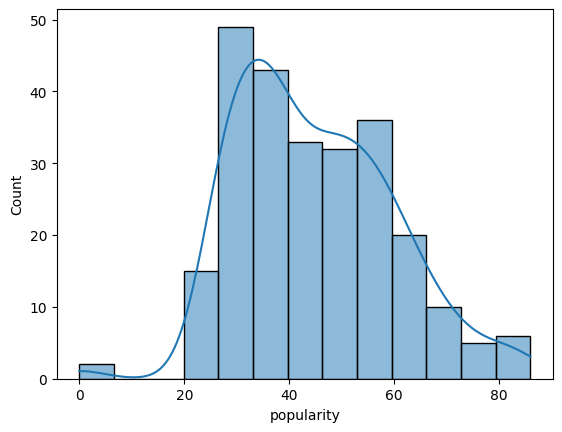

In [142]:
sns.histplot(ed_sheeran['popularity'], bins='auto', kde=True)
plt.show()

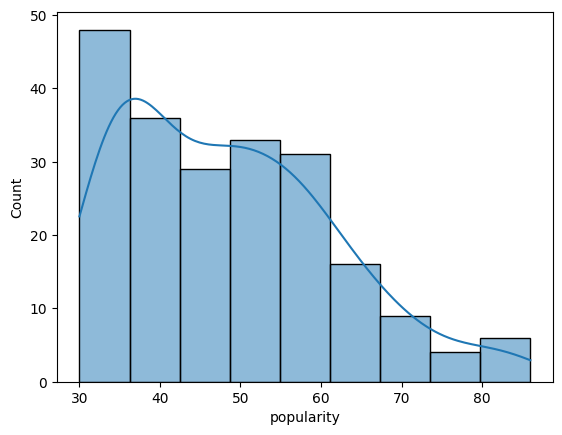

In [143]:
ed_sheeran = ed_sheeran[ed_sheeran['popularity']>=30]
sns.histplot(ed_sheeran['popularity'], bins='auto', kde=True)
plt.show()

In [144]:
ed_sheeran.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 0 to 250
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        212 non-null    int64  
 1   name              212 non-null    object 
 2   album             212 non-null    object 
 3   release_date      212 non-null    object 
 4   track_number      212 non-null    int64  
 5   id                212 non-null    object 
 6   uri               212 non-null    object 
 7   acousticness      212 non-null    float64
 8   danceability      212 non-null    float64
 9   energy            212 non-null    float64
 10  instrumentalness  212 non-null    float64
 11  liveness          212 non-null    float64
 12  loudness          212 non-null    float64
 13  speechiness       212 non-null    float64
 14  tempo             212 non-null    float64
 15  valence           212 non-null    float64
 16  popularity        212 non-null    int64  
 17  du

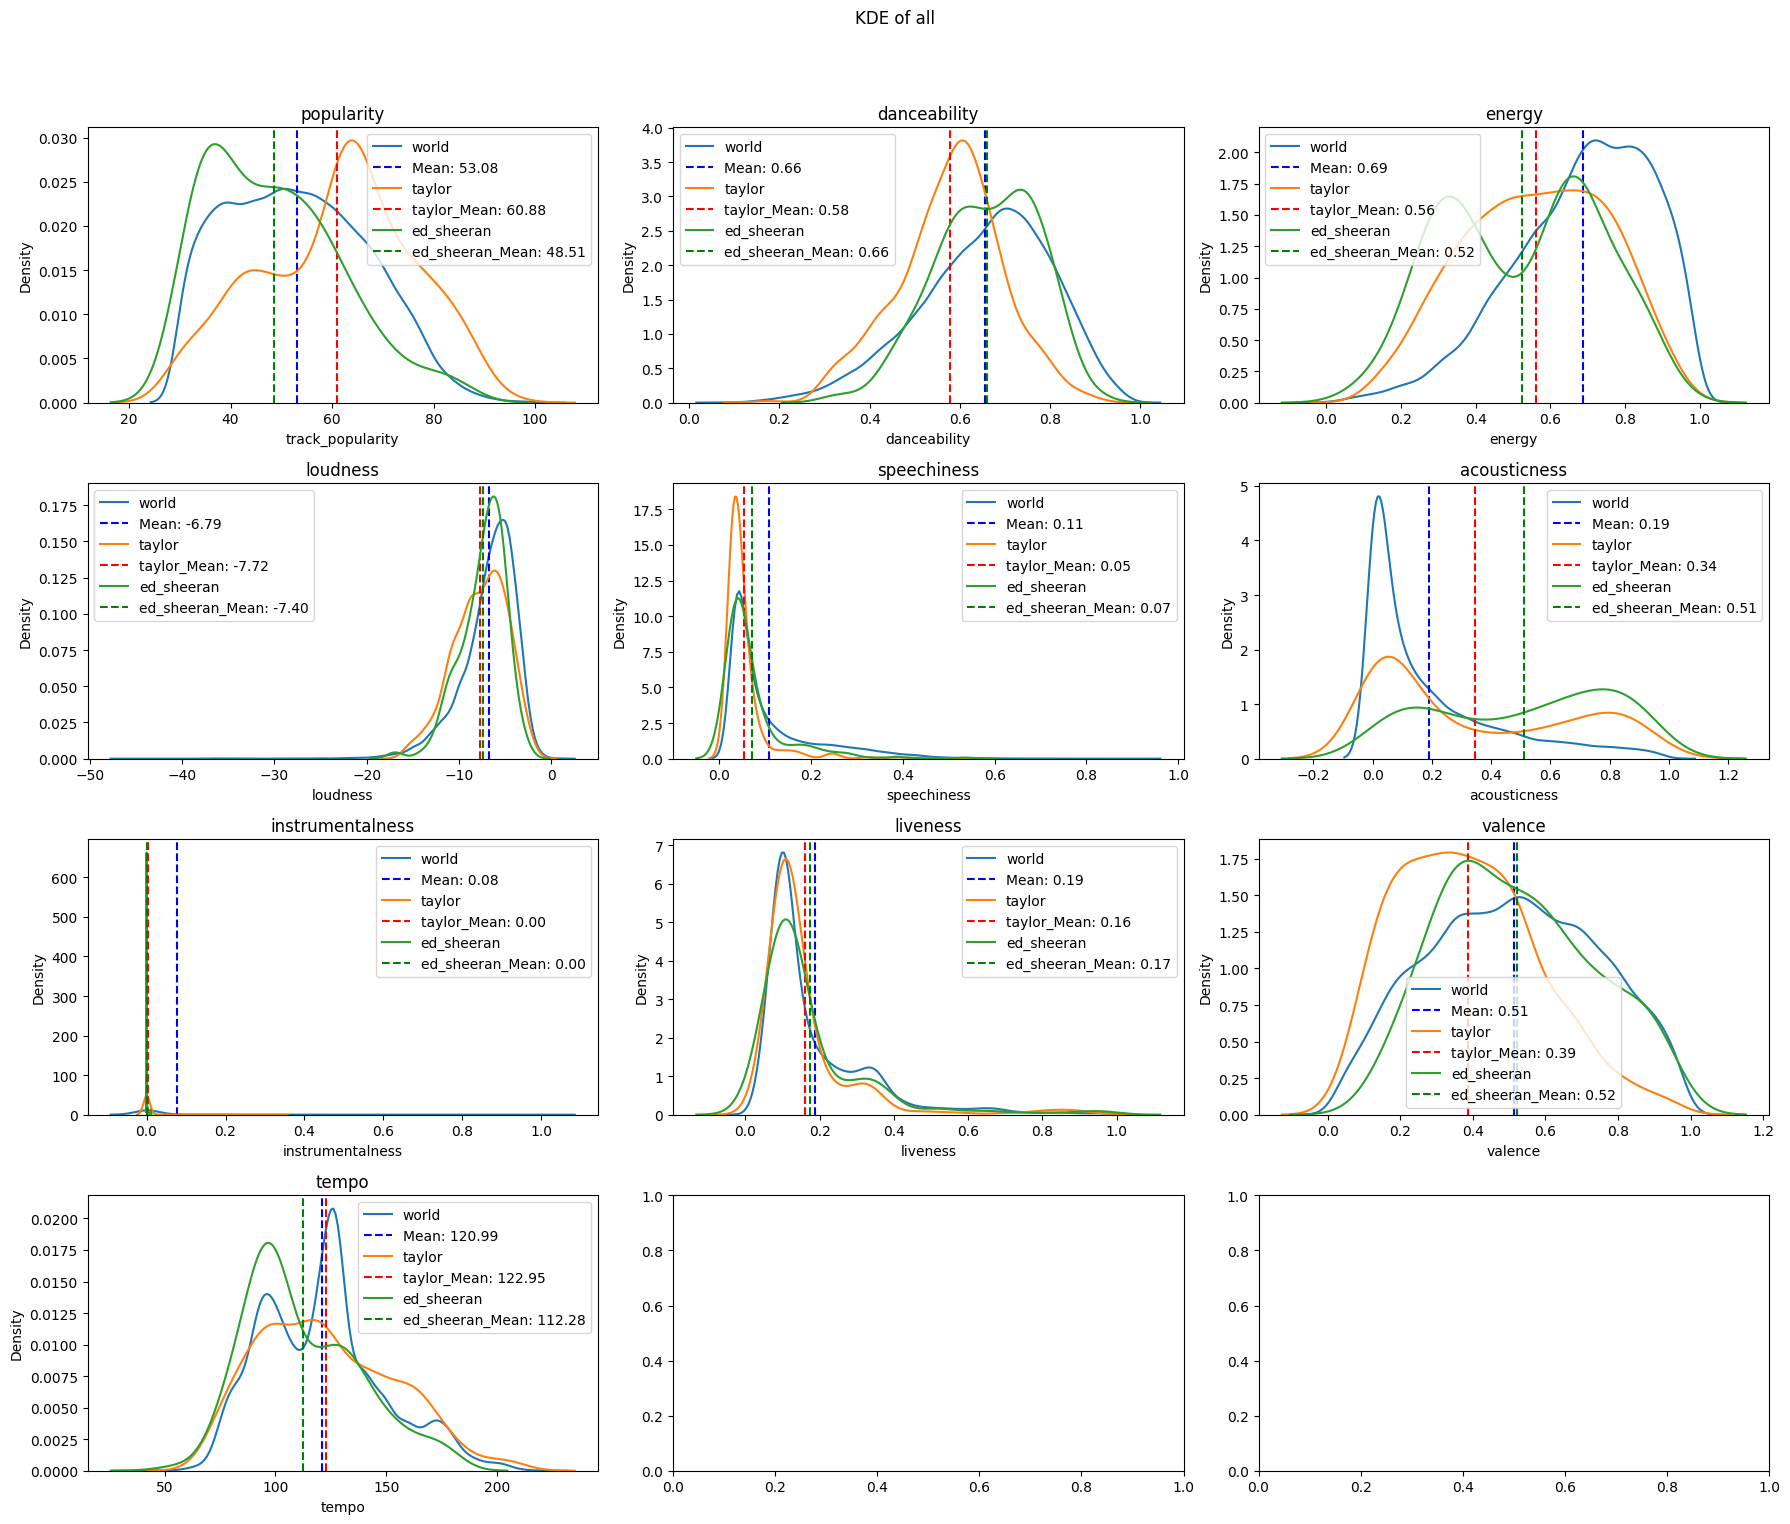

In [145]:
fig, axs = plt.subplots(4, 3, figsize=(18, 16))
fig.suptitle('KDE of all')

sns.kdeplot(data=df['track_popularity'], ax=axs[0, 0], label='world')
mean_value = np.mean(df['track_popularity'])
axs[0][0].axvline(mean_value, color='b', linestyle='--', label=f'Mean: {mean_value:.2f}')

sns.kdeplot(data=df_taylor['popularity'], ax=axs[0, 0], label='taylor')
mean_value = np.mean(df_taylor['popularity'])
axs[0][0].axvline(mean_value, color='r', linestyle='--', label=f'taylor_Mean: {mean_value:.2f}')

sns.kdeplot(data=ed_sheeran['popularity'], ax=axs[0, 0], label='ed_sheeran')
mean_value = np.mean(ed_sheeran['popularity'])
axs[0][0].axvline(mean_value, color='g', linestyle='--', label=f'ed_sheeran_Mean: {mean_value:.2f}')

axs[0, 0].legend(loc='best')
axs[0, 0].set_title('popularity')

# -----------------------------------------------------------------------------------------------------------------

sns.kdeplot(data=df['danceability'], ax=axs[0, 1], label='world')
mean_value = np.mean(df['danceability'])
axs[0][1].axvline(mean_value, color='b', linestyle='--', label=f'Mean: {mean_value:.2f}')

sns.kdeplot(data=df_taylor['danceability'], ax=axs[0, 1], label='taylor')
mean_value = np.mean(df_taylor['danceability'])
axs[0][1].axvline(mean_value, color='r', linestyle='--', label=f'taylor_Mean: {mean_value:.2f}')

sns.kdeplot(data=ed_sheeran['danceability'], ax=axs[0, 1], label='ed_sheeran')
mean_value = np.mean(ed_sheeran['danceability'])
axs[0][1].axvline(mean_value, color='g', linestyle='--', label=f'ed_sheeran_Mean: {mean_value:.2f}')

axs[0, 1].legend(loc='best')
axs[0, 1].set_title('danceability')

# -----------------------------------------------------------------------------------------------------------------

sns.kdeplot(data=df['energy'], ax=axs[0, 2], label='world')
mean_value = np.mean(df['energy'])
axs[0][2].axvline(mean_value, color='b', linestyle='--', label=f'Mean: {mean_value:.2f}')


sns.kdeplot(data=df_taylor['energy'], ax=axs[0, 2], label='taylor')
mean_value = np.mean(df_taylor['energy'])
axs[0][2].axvline(mean_value, color='r', linestyle='--', label=f'taylor_Mean: {mean_value:.2f}')

sns.kdeplot(data=ed_sheeran['energy'], ax=axs[0, 2], label='ed_sheeran')
mean_value = np.mean(ed_sheeran['energy'])
axs[0][2].axvline(mean_value, color='g', linestyle='--', label=f'ed_sheeran_Mean: {mean_value:.2f}')


axs[0, 2].legend(loc='best')
axs[0, 2].set_title('energy')

# -----------------------------------------------------------------------------------------------------------------

sns.kdeplot(data=df['loudness'], ax=axs[1, 0], label='world')
mean_value = np.mean(df['loudness'])
axs[1][0].axvline(mean_value, color='b', linestyle='--', label=f'Mean: {mean_value:.2f}')


sns.kdeplot(data=df_taylor['loudness'], ax=axs[1, 0], label='taylor')
mean_value = np.mean(df_taylor['loudness'])
axs[1][0].axvline(mean_value, color='r', linestyle='--', label=f'taylor_Mean: {mean_value:.2f}')

sns.kdeplot(data=ed_sheeran['loudness'], ax=axs[1, 0], label='ed_sheeran')
mean_value = np.mean(ed_sheeran['loudness'])
axs[1][0].axvline(mean_value, color='g', linestyle='--', label=f'ed_sheeran_Mean: {mean_value:.2f}')

axs[1, 0].legend(loc='best')
axs[1, 0].set_title('loudness')

# -----------------------------------------------------------------------------------------------------------------

sns.kdeplot(data=df['speechiness'], ax=axs[1, 1], label='world')
mean_value = np.mean(df['speechiness'])
axs[1][1].axvline(mean_value, color='b', linestyle='--', label=f'Mean: {mean_value:.2f}')

sns.kdeplot(data=df_taylor['speechiness'], ax=axs[1, 1], label='taylor')
mean_value = np.mean(df_taylor['speechiness'])
axs[1][1].axvline(mean_value, color='r', linestyle='--', label=f'taylor_Mean: {mean_value:.2f}')

sns.kdeplot(data=ed_sheeran['speechiness'], ax=axs[1, 1], label='ed_sheeran')
mean_value = np.mean(ed_sheeran['speechiness'])
axs[1][1].axvline(mean_value, color='g', linestyle='--', label=f'ed_sheeran_Mean: {mean_value:.2f}')

axs[1, 1].legend(loc='best')
axs[1, 1].set_title('speechiness')

# -----------------------------------------------------------------------------------------------------------------

sns.kdeplot(data=df['acousticness'], ax=axs[1, 2], label='world')
mean_value = np.mean(df['acousticness'])
axs[1][2].axvline(mean_value, color='b', linestyle='--', label=f'Mean: {mean_value:.2f}')

sns.kdeplot(data=df_taylor['acousticness'], ax=axs[1, 2], label='taylor')
mean_value = np.mean(df_taylor['acousticness'])
axs[1][2].axvline(mean_value, color='r', linestyle='--', label=f'taylor_Mean: {mean_value:.2f}')

sns.kdeplot(data=ed_sheeran['acousticness'], ax=axs[1, 2], label='ed_sheeran')
mean_value = np.mean(ed_sheeran['acousticness'])
axs[1][2].axvline(mean_value, color='g', linestyle='--', label=f'ed_sheeran_Mean: {mean_value:.2f}')

axs[1, 2].legend(loc='best')
axs[1, 2].set_title('acousticness')

# -----------------------------------------------------------------------------------------------------------------

sns.kdeplot(data=df['instrumentalness'], ax=axs[2, 0], label='world')
mean_value = np.mean(df['instrumentalness'])
axs[2][0].axvline(mean_value, color='b', linestyle='--', label=f'Mean: {mean_value:.2f}')

sns.kdeplot(data=df_taylor['instrumentalness'], ax=axs[2, 0], label='taylor')
mean_value = np.mean(df_taylor['instrumentalness'])
axs[2][0].axvline(mean_value, color='r', linestyle='--', label=f'taylor_Mean: {mean_value:.2f}')

sns.kdeplot(data=ed_sheeran['instrumentalness'], ax=axs[2, 0], label='ed_sheeran')
mean_value = np.mean(ed_sheeran['instrumentalness'])
axs[2][0].axvline(mean_value, color='g', linestyle='--', label=f'ed_sheeran_Mean: {mean_value:.2f}')

axs[2, 0].legend(loc='best')
axs[2, 0].set_title('instrumentalness')

# -----------------------------------------------------------------------------------------------------------------

sns.kdeplot(data=df['liveness'], ax=axs[2, 1], label='world')
mean_value = np.mean(df['liveness'])
axs[2][1].axvline(mean_value, color='b', linestyle='--', label=f'Mean: {mean_value:.2f}')

sns.kdeplot(data=df_taylor['liveness'], ax=axs[2, 1], label='taylor')
mean_value = np.mean(df_taylor['liveness'])
axs[2][1].axvline(mean_value, color='r', linestyle='--', label=f'taylor_Mean: {mean_value:.2f}')

sns.kdeplot(data=ed_sheeran['liveness'], ax=axs[2, 1], label='ed_sheeran')
mean_value = np.mean(ed_sheeran['liveness'])
axs[2][1].axvline(mean_value, color='g', linestyle='--', label=f'ed_sheeran_Mean: {mean_value:.2f}')

axs[2, 1].legend(loc='best')
axs[2, 1].set_title('liveness')

# -----------------------------------------------------------------------------------------------------------------

sns.kdeplot(data=df['valence'], ax=axs[2, 2], label='world')
mean_value = np.mean(df['valence'])
axs[2][2].axvline(mean_value, color='b', linestyle='--', label=f'Mean: {mean_value:.2f}')

sns.kdeplot(data=df_taylor['valence'], ax=axs[2, 2], label='taylor')
mean_value = np.mean(df_taylor['valence'])
axs[2][2].axvline(mean_value, color='r', linestyle='--', label=f'taylor_Mean: {mean_value:.2f}')

sns.kdeplot(data=ed_sheeran['valence'], ax=axs[2, 2], label='ed_sheeran')
mean_value = np.mean(ed_sheeran['valence'])
axs[2][2].axvline(mean_value, color='g', linestyle='--', label=f'ed_sheeran_Mean: {mean_value:.2f}')

axs[2, 2].legend(loc='best')
axs[2, 2].set_title('valence')

# -----------------------------------------------------------------------------------------------------------------

sns.kdeplot(data=df['tempo'], ax=axs[3, 0], label='world')
mean_value = np.mean(df['tempo'])
axs[3][0].axvline(mean_value, color='b', linestyle='--', label=f'Mean: {mean_value:.2f}')

sns.kdeplot(data=df_taylor['tempo'], ax=axs[3, 0], label='taylor')
mean_value = np.mean(df_taylor['tempo'])
axs[3][0].axvline(mean_value, color='r', linestyle='--', label=f'taylor_Mean: {mean_value:.2f}')

sns.kdeplot(data=ed_sheeran['tempo'], ax=axs[3, 0], label='ed_sheeran')
mean_value = np.mean(ed_sheeran['tempo'])
axs[3][0].axvline(mean_value, color='g', linestyle='--', label=f'ed_sheeran_Mean: {mean_value:.2f}')

axs[3, 0].legend(loc='best')
axs[3, 0].set_title('tempo')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [25]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# 특징 데이터 추출
X = df[features]
taylor_X = df_taylor[features]
ed_sheeran_X = ed_sheeran[features]

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
taylor_X_scaled = scaler.transform(taylor_X)
ed_sheeran_X_scaled = scaler.transform(ed_sheeran_X)

# 데이터프레임으로 변환
df_scaled = pd.DataFrame(X_scaled, columns=features)
taylor_df_scaled = pd.DataFrame(taylor_X_scaled, columns=features)
ed_sheeran_df_scaled = pd.DataFrame(ed_sheeran_X_scaled, columns=features)

# 전체 노래, 테일러 스위프트, 에드 시런의 평균값 계산
overall_mean = df_scaled.mean()
taylor_mean = taylor_df_scaled.mean()
ed_sheeran_mean = ed_sheeran_df_scaled.mean()

combined_mean = (taylor_mean + ed_sheeran_mean) / 2

mean_diff = (combined_mean - overall_mean).abs()
# print(mean_diff)

selected_features = mean_diff[mean_diff > mean_diff.mean()].index.tolist()

# 선택된 특징이 4개 미만일 경우 상위 4가지 특징을 선택한다.
if len(selected_features) < 4:
    selected_features = mean_diff.nlargest(4).index.tolist()

print(selected_features)

X = df[selected_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


['acousticness', 'energy', 'speechiness', 'instrumentalness']


C:\anaconda3\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda3\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda3\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda3\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

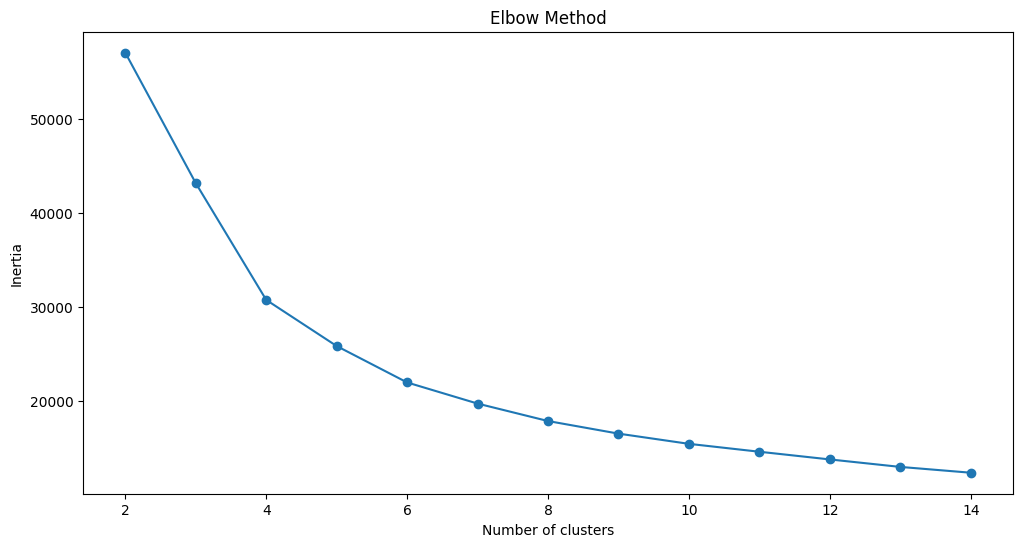

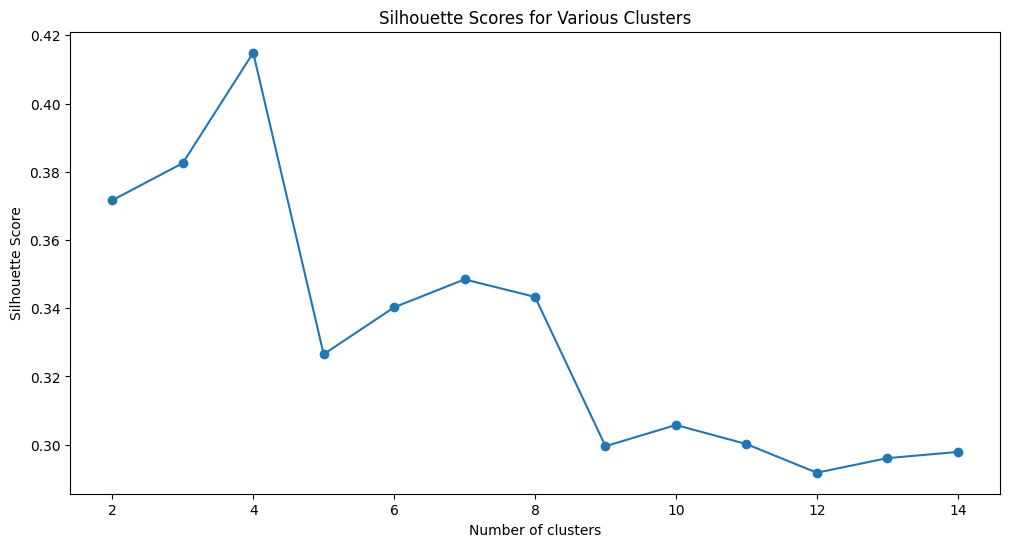

In [147]:
# 엘보우 방법을 사용하여 최적의 클러스터 수 찾기
inertia = []
silhouette_scores = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# 엘보우 그래프
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# 실루엣 점수 그래프
plt.figure(figsize=(12, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Various Clusters')
plt.show()

Silhouette Score: 0.47095216957259706


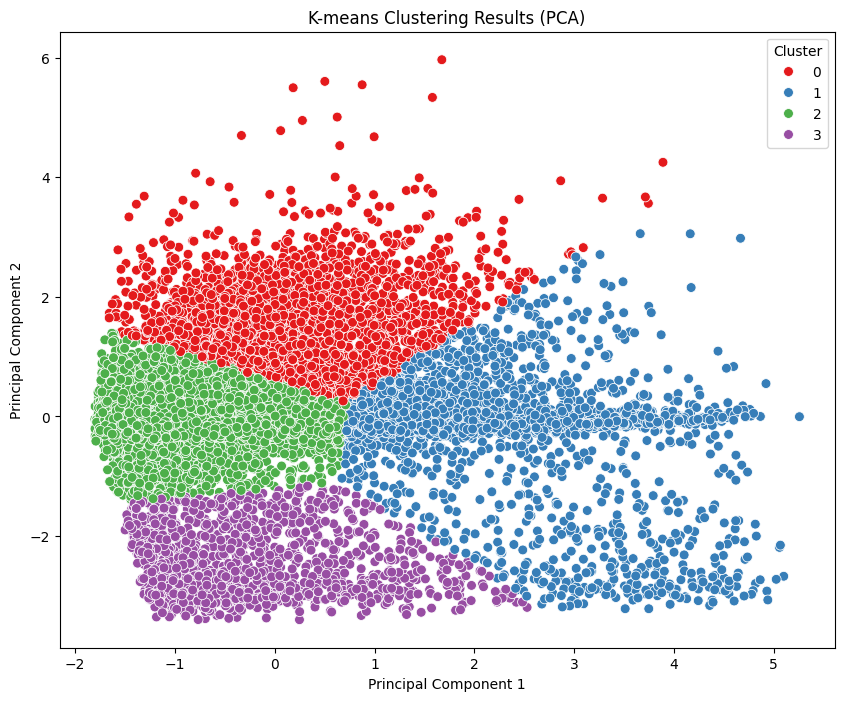

In [148]:
from sklearn.decomposition import PCA

optimal_k = 4

# PCA를 사용하여 차원 축소
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(X_pca)

# 실루엣 점수 계산
sil_score = silhouette_score(X_pca, df['cluster'])
print(f'Silhouette Score: {sil_score}')

# PCA 결과를 데이터프레임에 추가
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# scatterplot 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='Set1', s=50)
plt.title('K-means Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [149]:
# 테일러 스위프트와 에드 시런의 노래 선택 및 클러스터 확인
taylor_songs = df[df['track_artist'] == 'Taylor Swift']
ed_sheeran_songs = df[df['track_artist'] == 'Ed Sheeran']

# 각 아티스트의 노래가 포함된 클러스터 중에서 가장 많은 노래가 포함된 클러스터 찾기
taylor_cluster_counts = taylor_songs['cluster'].value_counts()
ed_sheeran_cluster_counts = ed_sheeran_songs['cluster'].value_counts()

# print(taylor_cluster_counts)
# print(ed_sheeran)

most_common_taylor_cluster = taylor_cluster_counts.idxmax()
most_common_ed_sheeran_cluster = ed_sheeran_cluster_counts.idxmax()

# print(most_common_taylor_cluster)
# print(most_common_ed_sheeran_cluster)

# 추천할 클러스터 결합 (중복 제거)
recommend_clusters = np.unique([most_common_taylor_cluster, most_common_ed_sheeran_cluster])


# 추천할 노래 선택
recommend_songs = df[df['cluster'].isin(recommend_clusters)]
recommend_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11382 entries, 0 to 32828
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  11382 non-null  object 
 1   track_name                11382 non-null  object 
 2   track_artist              11382 non-null  object 
 3   track_popularity          11382 non-null  int64  
 4   track_album_id            11382 non-null  object 
 5   track_album_name          11382 non-null  object 
 6   track_album_release_date  11382 non-null  object 
 7   playlist_name             11382 non-null  object 
 8   playlist_id               11382 non-null  object 
 9   playlist_genre            11382 non-null  object 
 10  playlist_subgenre         11382 non-null  object 
 11  danceability              11382 non-null  float64
 12  energy                    11382 non-null  float64
 13  key                       11382 non-null  int64  
 14  loudness   

In [150]:
recommend_songs.sort_values(by= 'track_popularity', ascending=False, inplace = True)
recommend_songs

C:\Users\Cho young won\AppData\Local\Temp\ipykernel_15012\1910825284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommend_songs.sort_values(by= 'track_popularity', ascending=False, inplace = True)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,pca1,pca2
20092,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636,2,-0.120531,0.538350
1301,21jGcNKet2qwijlDFuPiPb,Circles,Post Malone,98,4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,2019-09-06,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,0.0395,0.19200,0.002440,0.0863,0.553,120.042,215280,2,-0.353667,-0.267391
716,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573,2,-1.056512,-0.121083
5508,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,0.0559,0.10400,0.000000,0.7900,0.642,116.971,196653,2,0.052033,-0.101285
3155,4TnjEaWOeW0eKTKIEvJyCa,Falling,Trevor Daniel,97,1Czfd5tEby3DbdYNdqzrCa,Falling,2018-10-05,Electropop,2Z5cPJ6Z4EVZAfF08amjvL,pop,...,0.0364,0.12300,0.000000,0.0887,0.236,127.087,159382,2,0.693919,-0.192438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23102,6p1FD2W6hWIDqbtcmKjzU8,My Heart,Coopex,30,7K2jP7WpPDPQcxwNZ3Qo34,My Heart,2020-01-17,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,0.0397,0.25100,0.000000,0.1080,0.200,150.083,182571,2,0.186694,-0.226266
27355,76zNdWG1x77G6y0D0G1ZDr,Enjoy the Moment,Swingrowers,30,1Zo58diAaOKimtYyzny5LH,Remote,2014-08-14,Electro Swing Top 100,5M7xLCQTYJL0lbKIrUn3a4,edm,...,0.0791,0.16700,0.024600,0.8960,0.675,97.999,208541,2,-0.866607,-0.096073
31827,51a1wa8wjHt2fr5dhUbRQI,Anywhere For You - Tiësto VS. Dzeko & Torres R...,John Martin,30,5HlpmIHS8Ygp8MOehGmQDi,Anywhere For You (Remixes),2014-05-27,2011-2014 House,53Ga3Xt9fumdJfhNNSBvzU,edm,...,0.0447,0.00447,0.000122,0.1440,0.463,125.986,348560,2,-1.378893,-0.272907
27325,6ekZ73XINCNJ3ppPaHfViM,You Make Me Happy,11 Acorn Lane,30,1i2zvXaSnEZEcuHv7jaifC,You Make Me Happy,2019-06-20,Electro Swing Top 100,5M7xLCQTYJL0lbKIrUn3a4,edm,...,0.2430,0.15600,0.002660,0.8720,0.346,127.933,178053,2,-1.041320,1.110653


In [151]:
final_recommend_songs = recommend_songs.head(100)
final_recommend_songs

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,pca1,pca2
20092,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636,2,-0.120531,0.538350
1301,21jGcNKet2qwijlDFuPiPb,Circles,Post Malone,98,4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,2019-09-06,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,0.0395,0.19200,0.002440,0.0863,0.553,120.042,215280,2,-0.353667,-0.267391
716,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573,2,-1.056512,-0.121083
5508,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,0.0559,0.10400,0.000000,0.7900,0.642,116.971,196653,2,0.052033,-0.101285
3155,4TnjEaWOeW0eKTKIEvJyCa,Falling,Trevor Daniel,97,1Czfd5tEby3DbdYNdqzrCa,Falling,2018-10-05,Electropop,2Z5cPJ6Z4EVZAfF08amjvL,pop,...,0.0364,0.12300,0.000000,0.0887,0.236,127.087,159382,2,0.693919,-0.192438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,1rfofaqEpACxVEHIZBJe6W,Havana (feat. Young Thug),Camila Cabello,84,2vD3zSQr8hNlg0obNel4TE,Camila,2018-01-12,Post pop teen,222nc9tKxKhfZ2GBrOpwH3,pop,...,0.0300,0.18400,0.000036,0.1320,0.394,104.988,217307,2,0.524286,-0.259091
3790,58q2HKrzhC3ozto2nDdN4z,I Like It,Cardi B,84,4KdtEKjY3Gi0mKiSdy96ML,Invasion of Privacy,2018-04-06,10er Playlist,1kEczIkZH8IgaWT2BiApxZ,pop,...,0.1290,0.09900,0.000000,0.3720,0.650,136.048,253390,2,-0.461149,0.372826
1377,6WkJ2OK163XXS2oARUC9JM,Dancin (feat. Luvli) - Krono Remix,Aaron Smith,84,2J2f6vGACFrRghO1Ki74BE,Dancin (feat. Luvli) [Krono Remix],2014-11-07,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,0.0287,0.10100,0.000014,0.2890,0.357,119.896,198053,2,-0.558877,-0.337243
95,09IStsImFySgyp0pIQdqAc,The Middle,Zedd,84,7nEiwcUSwycvC77kZ9ub7c,The Middle,2018-01-23,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,0.0449,0.17100,0.000000,0.1120,0.437,107.010,184732,2,-0.017796,-0.193427
